# Model building and verification

#### Useful Links

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

### Load and pre-process data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

%run Data\ load.ipynb

give
False     265
True     4233
Name: give, dtype: int64
0.93739664540515
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4498 entries, 0 to 4586
Data columns (total 53 columns):
tender_num                        4498 non-null int64
deal_date                         4498 non-null datetime64[ns]
report_date                       4498 non-null datetime64[ns]
period                            4498 non-null int64
credit_amount                     4498 non-null float64
return_amount                     4498 non-null float64
rate                              4498 non-null float64
outstanding                       4498 non-null float64
return_date                       4498 non-null datetime64[ns]
expiration_date                   4498 non-null datetime64[ns]
tender_credit_amount              4498 non-null float64
tender_return_amount              4498 non-null float64
tender_interest_rate              4498 non-null float64
credit_amount_average             4498 non-null float64
credit_amo

### Imports

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import ShuffleSplit, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, explained_variance_score, mean_squared_error, confusion_matrix
import xgboost as xgb

import numpy as np
# import pylab as plt
from pylab import *
import seaborn as sns
# import matplotlib as mat

### Feature selection

In [4]:
features = [
    'deal_date_month',
    'expiration_date_month',
    'period',
    'credit_amount',
    'credit_amount_total',
    'creditors_count',
    'purpose_code',
    'rate',
#    'debt',
    'loan_count',
    'business_level',
    'reg_country_id',
    'reg_city_code',
    'pass_date_year',
    'empty_info',
    'return_rate',
    'return_amount_rate',
    'tender_interest_rate',
    'tender_credit_amount',
    'credit_amount_average',
    'credit_amount_to_average_ratio',
    'average_repeated_loan_count',
#    'connotation'
]
#deals[['credit_amount_total','return_rate', 'return_amount_rate']].head()

### Random Forest Regressor for delinquency

In [5]:
y = deals['delinq']
X = deals[features]
regr = RandomForestRegressor(max_depth=10, random_state=17, n_estimators=100)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
scores = cross_val_score(regr, X, y, cv=cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print(scores)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
regr.fit(X_train, y_train)
regr_pred = regr.predict(X_holdout)

# print(r2_score(y_holdout, regr_pred))
print("Accuracy on holdout set: %0.2f" % explained_variance_score(y_holdout.values, regr_pred))

[0.04473169 0.05104044 0.10939765 0.06601332 0.11081394]
Accuracy: 0.08 (+/- 0.06)
Accuracy on holdout set: 0.04


Feature impotance

In [6]:
# regr.fit(X, y)
beatiful_coef(regr.feature_importances_, features)

,coef
return_amount_rate,0.124677
credit_amount_total,0.120909
reg_city_code,0.075177
creditors_count,0.069291
tender_credit_amount,0.066357
credit_amount_average,0.061151
return_rate,0.060129
credit_amount_to_average_ratio,0.057619
average_repeated_loan_count,0.057455
credit_amount,0.051194


### Gradient Boost Regressor for delinquency

In [7]:
y = deals['delinq']
X = deals[features]

gbtree = GradientBoostingRegressor(n_estimators=100, subsample=0.5, random_state=17)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
scores = cross_val_score(gbtree, X, y, cv=cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
gbtree.fit(X_train, y_train)
gbtree_pred = gbtree.predict(X_holdout)

# print(r2_score(y_holdout, regr_pred))
print("Accuracy on holdout set: %0.2f" % explained_variance_score(y_holdout.values, gbtree_pred))

[0.01956981 0.05692242 0.03758126 0.03097813 0.10496608]
Accuracy: 0.05 (+/- 0.06)
Accuracy on holdout set: 0.02


In [8]:
beatiful_coef(gbtree.feature_importances_, features)

,coef
return_amount_rate,0.164872
credit_amount_total,0.137092
credit_amount_to_average_ratio,0.095448
return_rate,0.084960
credit_amount_average,0.077234
reg_city_code,0.069094
creditors_count,0.065466
tender_credit_amount,0.059883
tender_interest_rate,0.056960
average_repeated_loan_count,0.035274


### Random Forest Classifier for give

[0.9437037  0.94222222 0.94444444 0.94518519 0.92592593]
Accuracy: 0.94 (+/- 0.01)
Accuracy on holdout set: 0.94
[[   7   75]
 [   1 1267]]


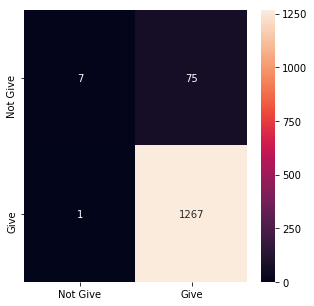

In [15]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)

y = deals['give']
X = deals[features]

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
scores = cross_val_score(forest, X, y, cv=cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
# forest_params = {
#     'max_depth': range(1,11),
#     'max_features': range(4,19)
# }
# forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
# forest_grid.fit(X_train, y_train)
# print(forest_grid.best_params_, forest_grid.best_score_)
# accuracy_score(y_holdout, forest_grid.predict(X_holdout))

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_holdout)

print("Accuracy on holdout set: %0.2f" % accuracy_score(y_holdout, forest_pred))

cm = confusion_matrix(y_holdout, forest_pred)
print(cm)

# deals['give_pred'] = forest_pred.predict(deals[features])
# deals[deals['give'] != deals['give_pred']][['outstanding', 'delinq', 'score', 'give', 'give_pred']]

labels = ['Not Give', 'Give']
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='d')


In [16]:
beatiful_coef(forest.feature_importances_, features)

,coef
return_amount_rate,0.080497
return_rate,0.077008
credit_amount_total,0.070432
credit_amount_average,0.065416
average_repeated_loan_count,0.063942
business_level,0.059842
creditors_count,0.058022
tender_interest_rate,0.057095
credit_amount,0.054523
reg_city_code,0.054354


### XGBoost Classifier for give

/Users/demon/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train dataset contains 3148 rows and 21 columns
Test dataset contains 1350 rows and 21 columns
Train mean target: 
0.9412325

Test mean target: 
0.94074076
[0]	test-error:0.060741	train-error:0.052414
[1]	test-error:0.054815	train-error:0.052097
[2]	test-error:0.054815	train-error:0.052732
[3]	test-error:0.054815	train-error:0.052414
[4]	test-error:0.054815	train-error:0.05305
[5]	test-error:0.056296	train-error:0.051779
[6]	test-error:0.057037	train-error:0.053367
[7]	test-error:0.057037	train-error:0.053367
[8]	test-error:0.057037	train-error:0.053367
[9]	test-error:0.057037	train-error:0.053367
[10]	test-error:0.057037	train-error:0.053367
[11]	test-error:0.055556	train-error:0.051461
[12]	test-error:0.055556	train-error:0.051779
[13]	test-error:0.057037	train-error:0.05305
[14]	test-error:0.057037	train-error:0.05305
[15]	test-error:0.057037	train-error:0.05305
[16]	test-error:0.057037	train-error:0.053685
[17]	test-error:0.057037	train-error:0.054003
[18]	test-error:0.057778	train

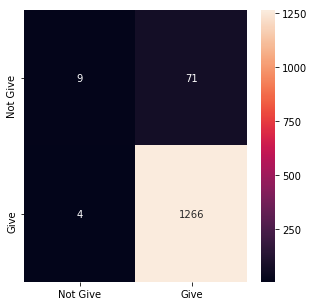

In [46]:
y = deals['give']
X = deals[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=17)
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

print("Train mean target: ")
print(np.mean(dtrain.get_label()))

print("\nTest mean target: ")
print(np.mean(dtest.get_label()))

params = {
    'objective':'binary:logistic',
    'max_depth': 3,
    'silent': 1,
    'eta': 0.2
}

num_rounds = 100

xgb_model = xgb.train(params, dtrain, num_rounds)

watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
xgb_model = xgb.train(params, dtrain, num_rounds, watchlist)

preds_prob = xgb_model.predict(dtrain)
predicted_labels = preds_prob > 0.5

print("Accuracy and F1 on the train set are: {} and {}".format(
    round(accuracy_score(y_train, predicted_labels), 3),
    round(f1_score(y_train, predicted_labels), 3)))


preds_prob = xgb_model.predict(dtest)
predicted_labels = preds_prob > 0.5

print("Accuracy and F1 on the test set are: {} and {}".format(
    round(accuracy_score(y_test, predicted_labels), 3),
    round(f1_score(y_test, predicted_labels), 3)))

cm = confusion_matrix(y_test, predicted_labels)
print(cm)

labels = ['Not Give', 'Give']
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='d')


Accuracy and F1 on the train set are: 0.948 and 0.973
Accuracy and F1 on the test set are: 0.946 and 0.972
[[   8   72]
 [   1 1269]]


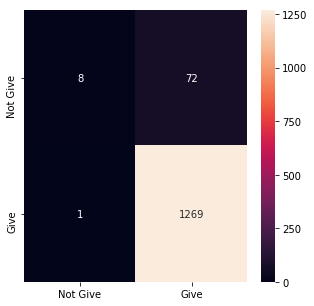

In [75]:
counts = deals.groupby('give')['give'].count()

xgb6 = xgb.XGBClassifier(
    learning_rate=0.007,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.6,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
#     learning_rate=0.009,
#     n_estimators=1000,
#     max_depth=3,
#     min_child_weight=3,
#     gamma=0.4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.005,
#     objective= 'binary:logistic',
#     nthread=4,
#     scale_pos_weight=counts[0]/counts[1],
#     seed=27
)

train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.3, stratify=y, random_state=17)

xgb6.fit(train_X, train_y)

predicted_labels = xgb6.predict(train_X)

print("Accuracy and F1 on the train set are: {} and {}".format(
    round(accuracy_score(y_train, predicted_labels), 3),
    round(f1_score(y_train, predicted_labels), 3)))

predicted_labels = xgb6.predict(test_X)

# preds_prob = xgb_model.predict(test_X)
# predicted_labels = preds_prob > 0.5

print("Accuracy and F1 on the test set are: {} and {}".format(
    round(accuracy_score(test_y, predicted_labels), 3),
    round(f1_score(test_y, predicted_labels), 3)))

cm = confusion_matrix(test_y, predicted_labels)
print(cm)

labels = ['Not Give', 'Give']
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='d')


## Model assessment

Plot options

In [76]:
plt.rcParams["figure.figsize"] = (10, 10)

### 1. Linear score

$$linear\_score = 1 - \frac{delinq}{delinq_{max}}$$

Normalize the `delinquency`

In [77]:
delinq_max = deals['delinq'].max()
d = deals[(deals['model'] == 'v1')].copy()
d['delinq_norm'] = d.apply(lambda row: 1 - row['delinq'] / delinq_max, axis=1)

#### Random Forest Model

In [78]:
explained_variance_score(d['delinq_norm'], d['rating'])

-1.8628156616570157

Mean squared error between normalized `delinquency` and rating in `v1` model

In [79]:
mean_squared_error(d['delinq_norm'], d['rating'])

0.0628813258357735

In [ ]:
# d[d['delinq_norm'] < 0.9].count()

Correllation between normalized `delinquency` and `v1` model `rating`

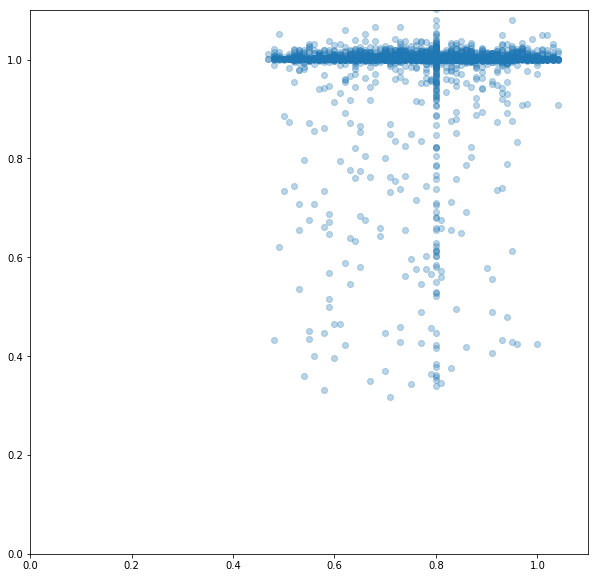

In [92]:
xlim(0, 1.1)
ylim(0, 1.1)
scatter(d['rating'], d['delinq_norm'], alpha=0.3)

#### Model v2

Predicting and normalyzing the `delinquency`

In [81]:
d['delinq_predicted'] = regr.predict(d[features])
d['delinq_predicted_norm'] = list(map(lambda row: 1 - row / delinq_max, d['delinq_predicted']))

Mean squared error between `real` and `predicted` `delinquency`

In [82]:
mean_squared_error(d['delinq_predicted_norm'], d['delinq_norm'])

0.003813900799646021

Correllation between normalized `real` and `predicted` `delinquency`

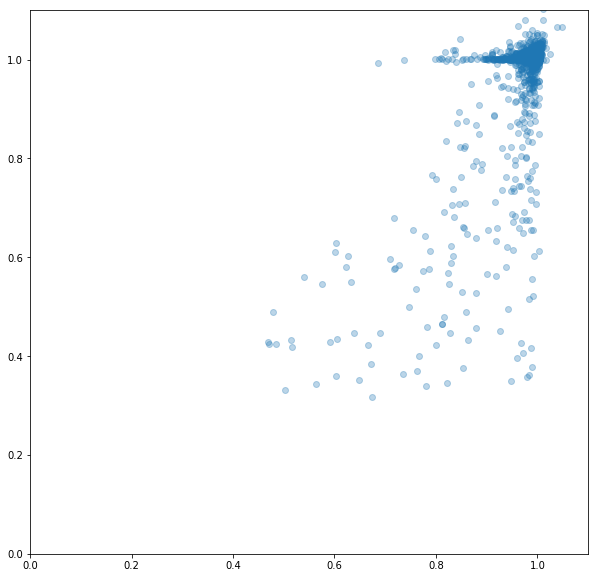

In [93]:
xlim(0, 1.1)
ylim(0, 1.1)
scatter(d['delinq_predicted_norm'], d['delinq_norm'], alpha=0.3)

Records having big difference between real and predicted `delinquency`

In [85]:
# d[(abs(d['delinq_predicted_norm'] - d['delinq_norm']) > 0.025) & (d['outstanding'] > 0)][['wmid', 'delinq', 'credit_amount', 'outstanding', 'return_amount', 'loan_count', 'credit_amount_total', 'credit_count_total', 'return_rate', 'return_amount_rate', 'tender_credit_amount', 'credit_amount_average', 'credit_amount_to_average_ratio', 'average_repeated_loan_count', 'purpose', 'guarantee', 'address', 'recommend']]


In [86]:
# d[(abs(d['delinq_predicted_norm'] - d['delinq_norm']) > 0.0025) & (d['outstanding'] == 0)][['wmid', 'delinq', 'credit_amount', 'outstanding', 'return_amount', 'loan_count', 'credit_amount_total', 'credit_count_total', 'return_rate', 'return_amount_rate', 'tender_credit_amount', 'credit_amount_average', 'credit_amount_to_average_ratio', 'purpose', 'guarantee', 'address', 'recommend']]